<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_POSTVALUATION_notFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [100]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])

dataset.head(2)


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0


In [101]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Target Column

In [105]:
dataset['Post Value (millions)']

3       166.00
7        14.10
8        14.10
9        14.10
10       14.10
        ...   
297      40.00
298      40.00
302     247.25
303    9229.98
304    9229.98
Name: Post Value (millions), Length: 160, dtype: float64

Filling missing values of Target column MOIC

In [103]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("$","") # removing $ from MOIC

dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace("x","") # removing $ from MOIC
dataset['Post Value (millions)']= dataset['Post Value (millions)'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'Post Value (millions)'] = dataset.loc[:,'Post Value (millions)'].astype(float) # converting MOIC to float from string


In [104]:
dataset.dropna(subset = ["Post Value (millions)"], inplace=True) # Drop rows with no values from Target column

In [106]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/EBITDA,160,100.000
Implied EV,160,100.000
Implied EV/EBIT,160,100.000
Implied EV/Net Income,160,100.000
Implied EV/Revenue,160,100.000
...,...,...
Raised to Date,10,6.250
Exit Size (millions),7,4.375
Total VC Capital Raised ($M)***,6,3.750
CEO PBId,5,3.125


Drop Column which has missing values more than 30%

In [107]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
dataset = dataset.drop(over30, axis = 1)

In [108]:
# Drop duplicate columns  
dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])

# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])


In [109]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [110]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,Early Stage VC,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,US Dollars (USD),8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07,0.07,NaN,Accelerator/Incubator,0.07,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.07,NaN,Accelerator/Incubator,NaN,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10,0.17,NaN,Accelerator/Incubator,0.10,Generating Revenue,Accelerator/Incubator Backed,2.0,18,US Dollars (USD),6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",NaN,0.17,1st Round,Early Stage VC,NaN,Generating Revenue,Venture Capital-Backed,8.0,18,US Dollars (USD),6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,Later Stage VC,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,US Dollars (USD),16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,Later Stage VC,51.35,Generating Revenue,Venture Capital-Backed,18.0,NaN,US Dollars (USD),16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NaN,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,67.53,67.53,1st Round,Later Stage VC,67.53,Profitable,Venture Capital-Backed,4.0,801,Chinese Yuan RMB (CNY),13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,Later Stage VC,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",US Dollars (USD),10.0


## Filling Missing Values

In [111]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
State,36,22.500
Total Invested Equity,34,21.250
CEO Education,33,20.625
# Investors,29,18.125
Deal Size,29,18.125
Current Employees,20,12.500
VC Round,16,10.000
Raised to Date,10,6.250
Total duration for Company,2,1.250


In [112]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))

# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [113]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,166.00,Merger/Acquisition,Early Stage VC,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10000,10.10,1st Round,Early Stage VC,10.100000,Generating Revenue,Venture Capital-Backed,2.000000,6.000000,US Dollars (USD),8.0
7,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.07000,0.07,not known,Accelerator/Incubator,0.070000,Generating Revenue,Accelerator/Incubator Backed,2.000000,18.000000,US Dollars (USD),6.0
8,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",61.76626,0.07,not known,Accelerator/Incubator,60.941349,Generating Revenue,Accelerator/Incubator Backed,2.000000,18.000000,US Dollars (USD),6.0
9,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",0.10000,0.17,not known,Accelerator/Incubator,0.100000,Generating Revenue,Accelerator/Incubator Backed,2.000000,18.000000,US Dollars (USD),6.0
10,14.10,Merger/Acquisition,Early Stage VC,Information Technology,Software,Application Software,"Mobile, LOHAS & Wellness, Big Data, Internet o...",Kitchener,Ontario,Canada,Formerly VC-backed,Generating Revenue,Venture Capital,"University of Waterloo, Bachelor's, Physics; W...",61.76626,0.17,1st Round,Early Stage VC,60.941349,Generating Revenue,Venture Capital-Backed,8.000000,18.000000,US Dollars (USD),6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13000,165.10,9th Round,Later Stage VC,12.130000,Generating Revenue,Venture Capital-Backed,7.633588,909.885714,US Dollars (USD),16.0
298,40.00,Merger/Acquisition,Series F,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35000,139.00,8th Round,Later Stage VC,51.350000,Generating Revenue,Venture Capital-Backed,18.000000,909.885714,US Dollars (USD),16.0
302,247.25,IPO,Corporate,Information Technology,Computer Hardware,"Computers, Parts and Peripherals","Manufacturing, TMT, CloudTech & DevOps",Beijing,NOT IN USA,China,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",No Known Education,67.53000,67.53,1st Round,Later Stage VC,67.530000,Profitable,Venture Capital-Backed,4.000000,801.000000,Chinese Yuan RMB (CNY),13.0
303,9229.98,IPO,Series D,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",No Known E

In [ ]:
'''''''''''''''''

# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["MOIC"])
plt.show()
sn.histplot(dataset, x ='MOIC')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="MOIC", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="MOIC", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types

''''''''''''''''''''''''''''

## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [115]:
### user defined function to label encode and decode dataset

#Encoder
def label_encoder(dataset):
    from sklearn.preprocessing import LabelEncoder

    #Takes in dataset, returns label encoded dataframe and the label encoder models
    dataset_lencoded = dataset.copy(deep=True);
    label_encoders = [None]*dataset.shape[1];

    for i in range(dataset.shape[1]):
        le = LabelEncoder()
        dataset_lencoded.iloc[:,i] = le.fit_transform(dataset_lencoded.iloc[:,i])
        label_encoders[i] = le
    return dataset_lencoded, label_encoders


#Decoder
def label_decoder(dataset_lencoded, label_encoders):

    #Takes in encoded dataframe and list of encoders and returns decoded dataset
    #Label encoder is a list of label encoder models pertaining to each column
    for i in range(dataset_lencoded.shape[1]):
        dataset_lencoded.iloc[:,i] = label_encoders[i].inverse_transform(dataset_lencoded.iloc[:,i])

    return dataset_lencoded #Now it is decoded

In [116]:
dataset, train_label_encoders=label_encoder(dataset)


Changing Data type of Column to perform correlation matrix

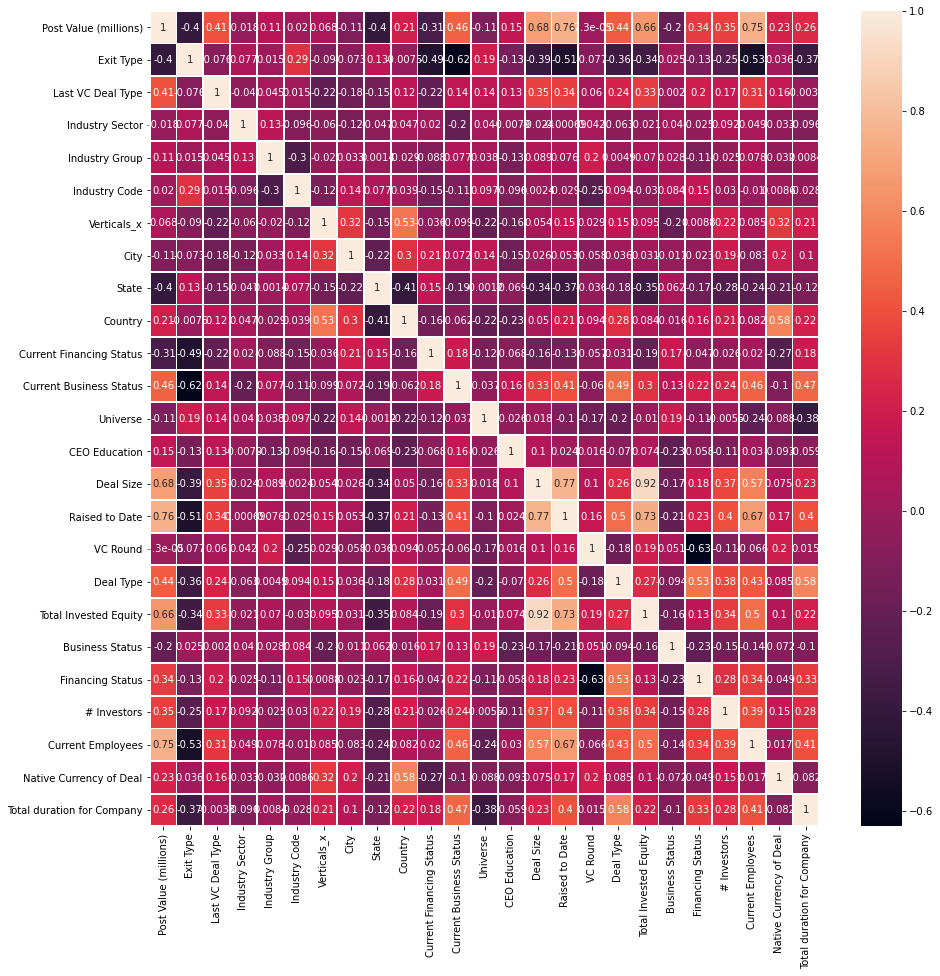

In [117]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Drop Column with high correlation with other columns

In [118]:
dataset=dataset.drop(columns=['Deal Size'])

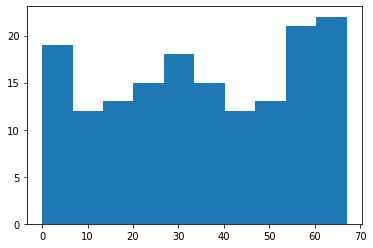

In [119]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['Post Value (millions)'])
pyplot.show()

In [135]:
dataset

,Post Value (millions),Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,30,2,1,1,4,2,20,13,12,9,0,0,10,5,37,2,2,43,0,4,0,0,5,3
7,6,2,1,1,4,0,12,16,10,2,0,0,10,64,0,12,0,1,0,0,0,3,5,1
8,6,2,1,1,4,0,12,16,10,2,0,0,10,64,0,12,0,79,0,0,0,3,5,1
9,6,2,1,1,4,0,12,16,10,2,0,0,10,64,3,12,0,2,0,0,0,3,5,1
10,6,2,1,1,4,0,12,16,10,2,0,0,10,64,3,2,2,79,0,4,7,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,12,2,12,1,4,3,28,15,7,9,0,0,4,16,98,10,5,46,0,4,6,35,5,12
298,12,2,12,1,4,3,28,15,7,9,0,0,4,8,91,9,5,75,0,4,17,35,5,12
302,37,1,0,1,0,4,10,2,6,3,0,2,9,35,74,2,5,82,3,4,2,33,1,9
303,64,1,9,1,4,3,26,24,0,9,0,2,9,35,95,6,5,92,0,4,11,50,5,6


In [121]:
X = dataset.iloc[:, 1:-1]

Y = dataset.iloc[:, 0:1]

In [122]:
X

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal
3,2,1,1,4,2,20,13,12,9,0,0,10,5,37,2,2,43,0,4,0,0,5
7,2,1,1,4,0,12,16,10,2,0,0,10,64,0,12,0,1,0,0,0,3,5
8,2,1,1,4,0,12,16,10,2,0,0,10,64,0,12,0,79,0,0,0,3,5
9,2,1,1,4,0,12,16,10,2,0,0,10,64,3,12,0,2,0,0,0,3,5
10,2,1,1,4,0,12,16,10,2,0,0,10,64,3,2,2,79,0,4,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2,12,1,4,3,28,15,7,9,0,0,4,16,98,10,5,46,0,4,6,35,5
298,2,12,1,4,3,28,15,7,9,0,0,4,8,91,9,5,75,0,4,17,35,5
302,1,0,1,0,4,10,2,6,3,0,2,9,35,74,2,5,82,3,4,2,33,1
303,1,9,1,4,3,26,24,0,9,0,2,9,35,95,6,5,92,0,4,11,50,5


In [134]:
Y

,Post Value (millions)
3,30
7,6
8,6
9,6
10,6
...,...
297,12
298,12
302,37
303,64


## Splitting the dataset into the Training set and Test set

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [125]:
print(X_train)

     Exit Type  Last VC Deal Type  ...  Current Employees  Native Currency of Deal
221          2                  6  ...                 35                        1
267          1                  9  ...                 31                        5
104          2                  6  ...                 28                        5
206          1                 10  ...                 44                        5
87           2                  7  ...                 23                        5
..         ...                ...  ...                ...                      ...
269          2                  7  ...                 48                        5
277          1                  2  ...                 47                        5
137          2                  7  ...                 19                        5
280          1                 12  ...                 41                        5
68           2                  2  ...                 10                        5

[12

In [126]:
print(X_test)

     Exit Type  Last VC Deal Type  ...  Current Employees  Native Currency of Deal
52           2                  1  ...                  4                        1
76           2                  2  ...                 36                        5
32           1                  2  ...                 37                        5
186          2                  3  ...                  0                        5
158          2                  4  ...                  2                        5
38           2                  8  ...                 35                        1
78           2                  2  ...                 36                        5
24           2                  4  ...                  1                        5
74           2                  4  ...                 13                        5
200          1                  2  ...                 24                        1
184          2                  3  ...                  0                        5
195 

In [127]:
print(y_train)

     Post Value (millions)
221                     41
267                     51
104                     36
206                     55
87                      43
..                     ...
269                     60
277                     66
137                     39
280                     50
68                       2

[128 rows x 1 columns]


In [128]:
print(y_test)

     Post Value (millions)
52                      16
76                      26
32                      58
186                      3
158                     29
38                      35
78                      26
24                      17
74                      23
200                      0
184                      3
195                     57
139                     13
209                     18
108                     38
185                      3
125                     31
99                      14
218                     44
204                     55
296                     65
63                       1
91                      45
11                       7
163                     28
55                      56
34                      58
285                     67
283                     67
188                      3
250                     23
207                     55


Defining reusable function for model performance evaluation

In [129]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test["Post Value (millions)"].values
    print(f"{pr1}")

   
  

### Model Building

Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [131]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [132]:
y_predtrain.mean(axis=0)

array([36.375])

Evaluate Model Performance

In [133]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 8.315537197834336
RMSE Test error is 10.860540632647272
MAE Train error is 6.3957960981847455
MAE Test error is 7.164446487815787
         Pred  Actual
0   20.782747      16
1   32.968359      26
2   52.005810      58
3   -4.573933       3
4   24.625419      29
5   31.230386      35
6   39.241366      26
7   16.037520      17
8    8.352049      23
9   -0.032424       0
10  10.258962       3
11  53.081391      57
12  54.132701      13
13  43.540883      18
14  32.295550      38
15   3.896574       3
16  18.174313      31
17  14.466998      14
18  40.108860      44
19  56.739722      55
20  60.912609      65
21   9.399682       1
22  28.231044      45
23   5.945778       7
24  25.907589      28
25  53.447889      56
26  50.532712      58
27  62.730300      67
28  59.631871      67
29  -3.650490       3
30  21.411028      23
31  56.239565      55


Ridge Regression

---



In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [ ]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 5594.664
Config: {'alpha': 0.99}


In [ ]:

ridge_model= Ridge(alpha=0.99)
ridge_model.fit(X_train,y_train)




In [136]:
y_predtrain= ridge_model.predict(X_train)

y_predtest= ridge_model.predict(X_test)



NameError: ignored

Evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 4309.019846021893
RMSE Test error is 7653.307140640764
MAE Train error is 2645.816354980353
MAE Test error is 4458.808628251164
            Pred        Actual
0    4861.342169   2171.180000
1    4876.119453   1766.670000
2   15831.248483   6000.000000
3    1996.848453    221.110000
4    5394.148913   2171.180000
5    1081.764142    163.800000
6     -70.534169     70.000000
7     602.339147    163.800000
8    1134.088046    292.900000
9   -1473.586470      5.100000
10   4339.800451   2742.805288
11   3510.307404    144.100000
12    914.780248     70.000000
13   5903.240749   2171.180000
14   1077.477962    163.800000
15  12847.332936  33203.400000
16  19639.447186   9229.980000
17   6409.571430   7825.540000
18   1583.121225   2742.805288
19  -2087.162288     40.000000
20  -3532.544864      4.000000
21   9014.705184  33203.400000


In [ ]:
#ridge_regressor.cv_results_

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 744004246.4470508, tolerance: 325226.5544727695
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-

In [ ]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 5773.498
 {'alpha': 0.99}


In [ ]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrain= lasso_model.predict(X_train)



In [ ]:
y_predtest= ridge_model.predict(X_test)



Model Performance Evaluation

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 4306.193842291399
RMSE Test error is 7653.307140640764
MAE Train error is 2644.507736751244
MAE Test error is 4458.808628251164
            Pred        Actual
0    4861.342169   2171.180000
1    4876.119453   1766.670000
2   15831.248483   6000.000000
3    1996.848453    221.110000
4    5394.148913   2171.180000
5    1081.764142    163.800000
6     -70.534169     70.000000
7     602.339147    163.800000
8    1134.088046    292.900000
9   -1473.586470      5.100000
10   4339.800451   2742.805288
11   3510.307404    144.100000
12    914.780248     70.000000
13   5903.240749   2171.180000
14   1077.477962    163.800000
15  12847.332936  33203.400000
16  19639.447186   9229.980000
17   6409.571430   7825.540000
18   1583.121225   2742.805288
19  -2087.162288     40.000000
20  -3532.544864      4.000000
21   9014.705184  33203.400000


In [ ]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

#coeffs = lasso_model.sparse_coef_  # sparse matrix

#coeffs = lasso_model.intercept_    # probably also releva

coeffs



array([ 2.89497288e-03, -2.33215193e-02,  1.69356757e-02, -8.51662917e-02,
        7.97980463e-03, -1.01063651e+00, -0.00000000e+00, -9.04875533e-02,
        0.00000000e+00,  2.63487064e-01, -7.23959108e-02,  4.47847186e-01,
        1.54704964e-01, -5.75684938e-02, -2.04804252e-01,  2.99826635e+00,
        3.14728407e+00, -3.87095142e-02,  6.92989441e-03,  1.61704670e-02])

In [ ]:
X_test

,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE
288,110.000000,345.500000,110.000000,13.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,7
267,90.000000,173.700000,90.000000,11.000000,669.000000,12.0,1,9,1,3,2,7,19,0,7,1,1,6,44,5
269,252.500000,252.500000,252.500000,11.000000,2968.000000,8.0,2,7,1,3,12,18,19,0,7,1,0,6,39,2
253,15.000000,37.500000,15.000000,5.000000,123.000000,16.0,1,7,1,3,8,18,19,0,7,1,1,6,29,5
289,75.000000,235.500000,75.000000,12.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,6
158,55.941717,0.800000,56.760213,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
250,0.070000,118.873558,56.760213,4.000000,11.000000,8.0,2,4,1,3,2,18,19,0,7,1,0,7,4,11
157,0.120000,1.840000,0.120000,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
137,15.700000,27.100000,15.700000,2.000000,112.000000,8.0,2,7,1,3,9,14,16,0,7,1,0,7,2,3
187,2.050000,7.070000,2.050000,6.000000,6.000000,6.0,2,3,1,3,12,13,23,11,7,1,0,7,6,3


### XGBOOST

In [137]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
y_predtrain= xgb_r.predict(train_dmatrix)
y_predtest = xgb_r.predict(test_dmatrix) 
  


[05:57:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
print(mean(y_test))


NameError: ignored

Model Performance Evaluation

In [140]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 9.65779772873501
RMSE Test error is 11.133379662224563
MAE Train error is 7.461121853441
MAE Test error is 7.858122237026691
         Pred  Actual
0   27.364212      16
1   28.495106      26
2   50.815533      58
3   -9.126108       3
4   19.153431      29
5   37.933563      35
6   32.382046      26
7   18.961262      17
8   11.381953      23
9    6.957652       0
10   7.978627       3
11  47.853977      57
12  57.220985      13
13  36.910378      18
14  37.028286      38
15   0.299472       3
16  22.622379      31
17   8.485117      14
18  46.784035      44
19  56.950397      55
20  58.814823      65
21  10.963643       1
22  27.252018      45
23   3.256879       7
24  29.104027      28
25  50.086353      56
26  48.470406      58
27  62.615009      67
28  63.549702      67
29  -7.237123       3
30  27.898563      23
31  53.122478      55
